### Goal of notebook: some visualization of the data, some descriptive statistics (including biases in labels), explain what you are doing in text cells.


Load pickled data from Milestone 1 notebook into notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

#with open('/content/drive/MyDrive/Deep Dive Team 20/Milestone2/full_dataset_one_hot_encoded (1).pkl', 'rb') as f:
with open('/content/drive/MyDrive/full_dataset_one_hot_encoded (1).pkl', 'rb') as f:
  df = pickle.load(f)

print(df)
print(df.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        INSPECTION_TYPE           BBL  BORO_CODE  BLOCK  LOT HOUSE_NUMBER  \
0               Initial  3.018170e+09          3   1817   57          213   
1               Initial  3.018170e+09          3   1817   57          213   
2               Initial  3.018170e+09          3   1817   57          213   
3               Initial  3.018170e+09          3   1817   57          213   
4               Initial  3.018170e+09          3   1817   57          213   
...                 ...           ...        ...    ...  ...          ...   
7480721      Compliance  4.006520e+09          4    652  153        25-18   
7480722      Compliance  4.006520e+09          4    652  153        25-18   
7480723      Compliance  4.006520e+09          4    652  153        25-18   
7480724      Compliance  4.006520e+09          4    652  153        25-18   
7480725      Compliance 

## Exploring and Visualizing Data Distribution

Let's start by looking at the overall distribution of results

RESULT
Passed                5307886
Rat Activity          1327498
Failed for Other R     845342
Name: count, dtype: int64


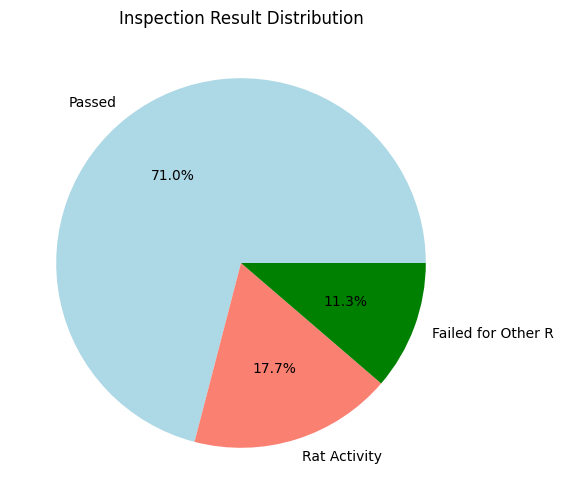

In [3]:
insp_counts = df['RESULT'].value_counts()
print(insp_counts)
# Pie chart for inspection results
result_counts = df['RESULT'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon', 'green'])
plt.title('Inspection Result Distribution')
plt.show()


As one would expect (and hope), most inspections pass without any signs of rodents. We have a good amount of rat acivity present, and a relatively high amount for other reasons as well.

Let us now look into the quantity of inspections for each month to evaluate if data is evenly distributed throughout the year

In [4]:
month_counts = df['MONTH'].value_counts().sort_index()
print(month_counts)

MONTH
1     512217
2     540499
3     709522
4     731607
5     661703
6     654417
7     580972
8     626735
9     612222
10    616744
11    604362
12    629726
Name: count, dtype: int64


Our data is mostly evenly distributed but the spring and summer months have more inspections (and thus rodent sightings) than winter months. This will likely affect our data analysis.

Since we have more detailed time data, we can further look into this and create variables that will come in handy for future exploration. We can see that there are a few (<100) rows with inspections before 2009. Let us remove these to be more consistent with the overall data.

In [5]:
df['Year'] = df['INSPECTION_DATE'].dt.year
df['Month'] = df['INSPECTION_DATE'].dt.month
df = df[df['INSPECTION_DATE'] >= '2009-09-07'] #removing junk data prior to this

# Calculate monthly inspection counts
monthly_inspections = df.groupby(['Year', 'Month']).size().reset_index(name='Inspection_Count')
print("\nMonthly Inspection Counts:")
print(monthly_inspections)

# Calculate monthly failure rates
monthly_fail_rate = df.groupby(['Year', 'Month'])['RESULT'].apply(
    lambda x: (x != 'Passed').mean()
).reset_index(name='Failure_Rate')
print("\nMonthly Failure Rates:")
print(monthly_fail_rate)



Monthly Inspection Counts:
     Year  Month  Inspection_Count
0    2009      9              7310
1    2009     10             26129
2    2009     11             26768
3    2009     12             19714
4    2010      1             33855
..    ...    ...               ...
176  2024      6             12521
177  2024      7             15909
178  2024      8             17631
179  2024      9             15421
180  2024     10              8506

[181 rows x 3 columns]

Monthly Failure Rates:
     Year  Month  Failure_Rate
0    2009      9      0.757182
1    2009     10      0.495388
2    2009     11      0.426965
3    2009     12      0.509283
4    2010      1      0.424900
..    ...    ...           ...
176  2024      6      0.576312
177  2024      7      0.578100
178  2024      8      0.579377
179  2024      9      0.603139
180  2024     10      0.583000

[181 rows x 3 columns]


In [6]:
print("\nStatistics for Monthly Inspection Counts:")
print(monthly_inspections['Inspection_Count'].describe())

# Descriptive statistics for monthly failure rates
print("\nStatistics for Monthly Failure Rates:")
print(monthly_fail_rate['Failure_Rate'].describe())



Statistics for Monthly Inspection Counts:
count      181.000000
mean     41329.895028
std      25590.841199
min       3209.000000
25%      16073.000000
50%      41176.000000
75%      60530.000000
max      98395.000000
Name: Inspection_Count, dtype: float64

Statistics for Monthly Failure Rates:
count    181.000000
mean       0.362368
std        0.140936
min        0.142986
25%        0.255566
50%        0.297607
75%        0.508722
max        0.757182
Name: Failure_Rate, dtype: float64


We can see that we have about 41000 inspections every month, with the minimum coming from the first month of the dataset. We also see about a 36% failure rate overall, which is different from the expected 29% based on the result pie chart.

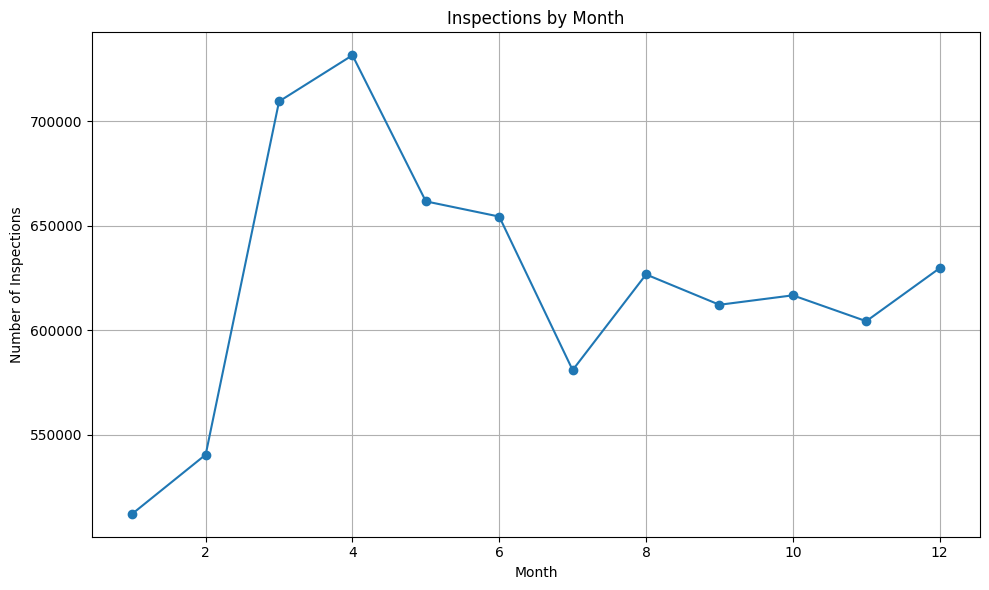

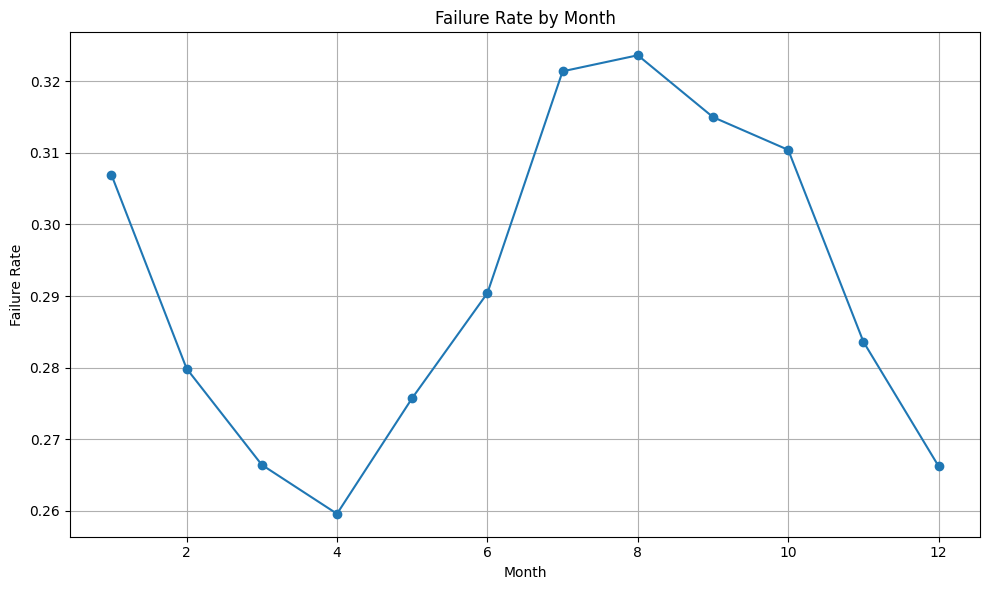

In [7]:
plt.figure(figsize=(10, 6))
# Monthly inspection counts
monthly_counts = df.groupby('Month').size()
monthly_counts.plot(kind='line', marker='o')
plt.title('Inspections by Month')
plt.xlabel('Month')
plt.ylabel('Number of Inspections')
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly failure rates
plt.figure(figsize=(10, 6))
monthly_fails = df.groupby('Month')['RESULT'].apply(
    lambda x: (x != 'Passed').mean()
)
monthly_fails.plot(kind='line', marker='o')
plt.title('Failure Rate by Month')
plt.xlabel('Month')
plt.ylabel('Failure Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


We see mostly consistent inspections every month, with a dip right after december and a peak (likely due to pent up inspections from Jan and Feb) in March and May.
When looking at the failure rate, we see mostly expected results, with gradual peaks during the summer and gradual dips during the winter and spring. The spring dip might be related to the higher number of inspections during those months.

Quantity of Inspections for each boro code to se if data is evenly distributed throughout NY

In [8]:
boro_counts = df['BORO_CODE'].value_counts().sort_index()
print(boro_counts)

BORO_CODE
1    2116368
2    1933272
3    2578086
4     806218
5      46767
Name: count, dtype: int64


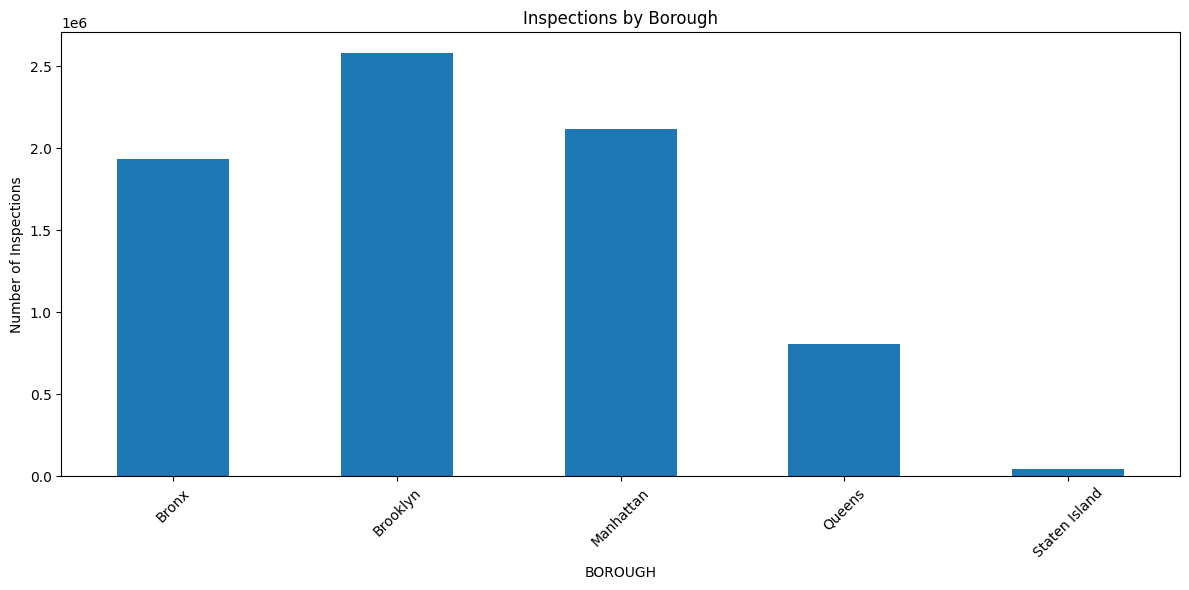

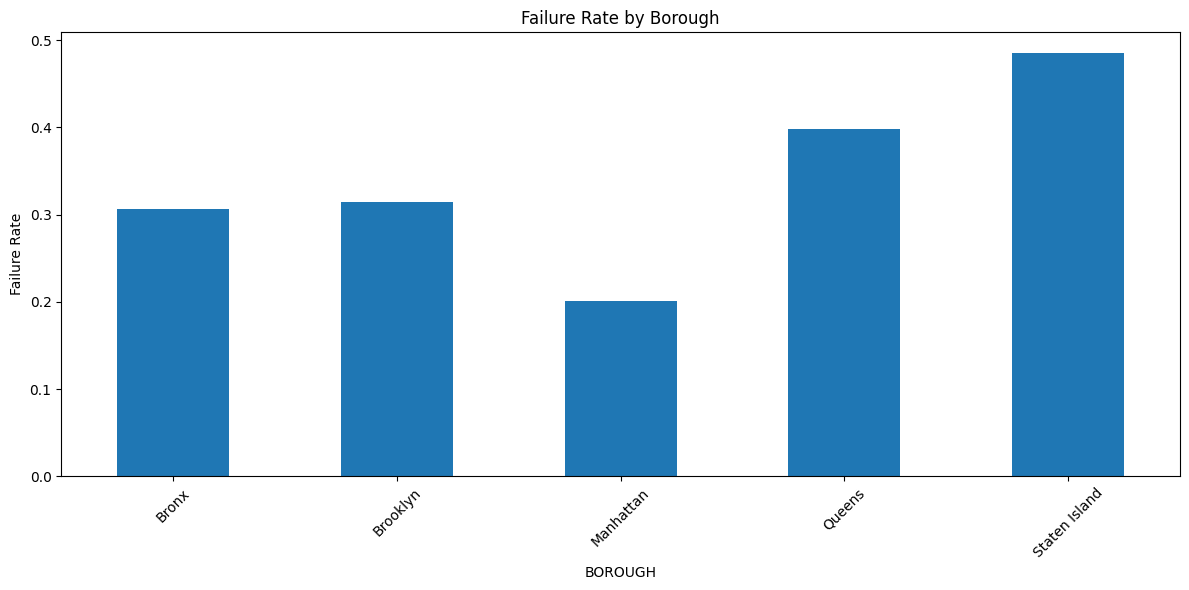


Borough Statistics:
                RESULT            REFUSETONSCOLLECTED PAPERTONSCOLLECTED  \
                 count <lambda_0>                mean               mean   
BOROUGH                                                                    
Bronx          1933272      0.306            2897.804            217.518   
Brooklyn       2578086      0.315            3759.797            412.217   
Manhattan      2116368      0.201            2957.481            491.299   
Queens          806218      0.398            4226.536            476.252   
Staten Island    46767      0.485            5087.385            675.175   

              MGPTONSCOLLECTED  
                          mean  
BOROUGH                         
Bronx                  257.780  
Brooklyn               349.353  
Manhattan              351.294  
Queens                 453.857  
Staten Island          578.735  


In [9]:
# Borough inspection counts
plt.figure(figsize=(12, 6))
borough_counts = df.groupby('BOROUGH').size()
borough_counts.plot(kind='bar')
plt.title('Inspections by Borough')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Borough failure rates
plt.figure(figsize=(12, 6))
borough_fails = df.groupby('BOROUGH')['RESULT'].apply(
    lambda x: (x != 'Passed').mean()
)
borough_fails.plot(kind='bar')
plt.title('Failure Rate by Borough')
plt.ylabel('Failure Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print borough statistics
print("\nBorough Statistics:")
print(df.groupby('BOROUGH').agg({
    'RESULT': ['count', lambda x: (x != 'Passed').mean()],
    'REFUSETONSCOLLECTED': 'mean',
    'PAPERTONSCOLLECTED': 'mean',
    'MGPTONSCOLLECTED': 'mean'
}).round(3))


We have very little data on rat inspections/activity in borough 5 (Staten Island) which means our predictions may not have strong performance for Staten Island.
We can also see that it has the highest failure rate (% of inspections not passed), which is likely due to the small quantity of data in the first place. It might make sense to focus on the other 4 for our final analysis and work separately on Staten Island.



During the last milestone, we added sanitation data to our initial dataset. Let's see if we can immediately see any correlations between the sanitation data and inspection results

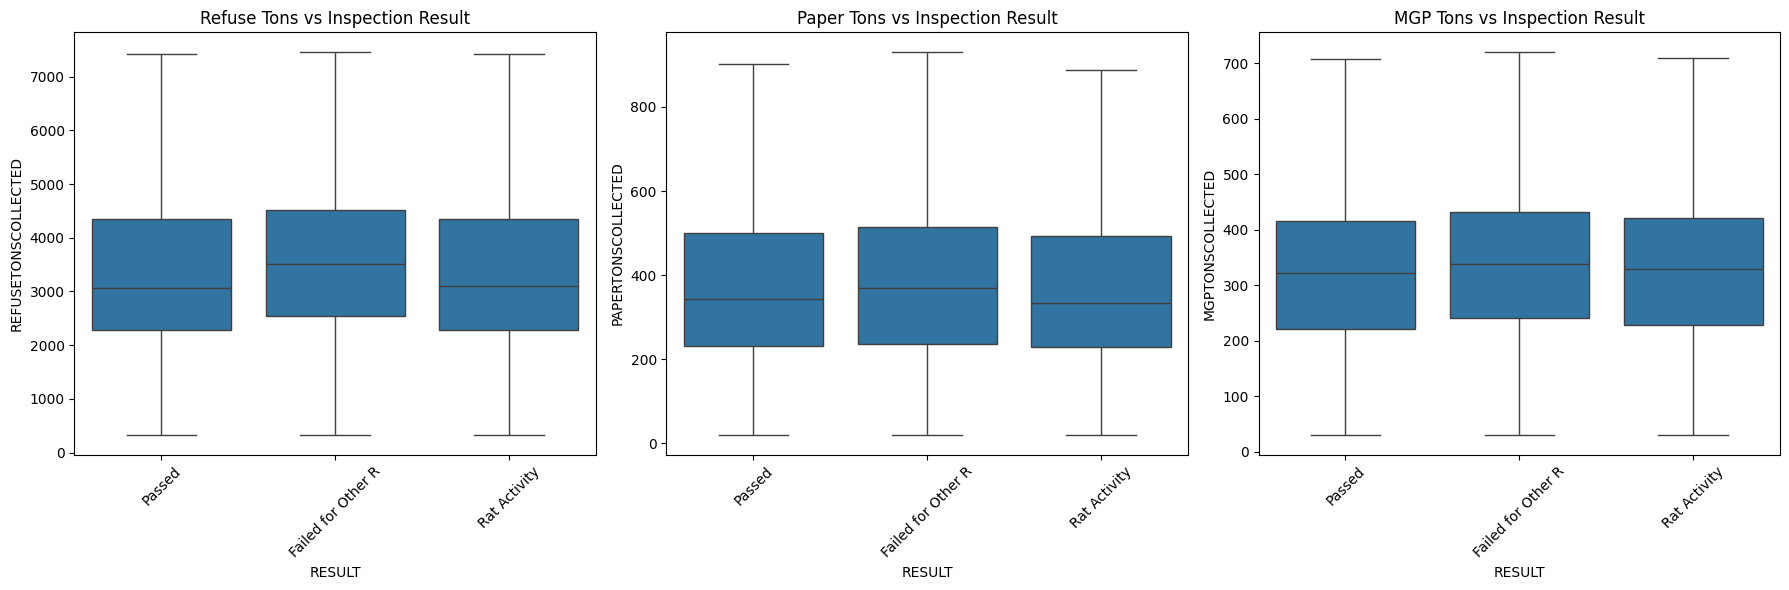

In [10]:
plt.figure(figsize=(18, 6))

# Refuse correlation
plt.subplot(131)
sns.boxplot(x='RESULT', y='REFUSETONSCOLLECTED', data=df, showfliers=False)
plt.title('Refuse Tons vs Inspection Result')
plt.xticks(rotation=45)

# Paper correlation
plt.subplot(132)
sns.boxplot(x='RESULT', y='PAPERTONSCOLLECTED', data=df, showfliers=False)
plt.title('Paper Tons vs Inspection Result')
plt.xticks(rotation=45)

# MGP correlation
plt.subplot(133)
sns.boxplot(x='RESULT', y='MGPTONSCOLLECTED', data=df, showfliers=False)
plt.title('MGP Tons vs Inspection Result')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Based on the above plots, we can at least conclude that the amount of waste collected from locations seems to be very slightly be associated with a failed for other reasons results, but not rat activity for some reason. This is worth looking further into. We also seem to have quite a few outliers for the sanitation data indicating that it requires further cleanup or geospatial mapping.

In [ ]:
from scipy import stats

# ANOVA test for the result category (excluding other reasons)
def anova_test(df, column):
    passed_data = df[df['RESULT'] == 'Passed'][column]
    failed_data = df[df['RESULT'] == 'Rat Activity'][column]
    return stats.f_oneway(passed_data, failed_data)

refuse_anova = anova_test(df, 'REFUSETONSCOLLECTED')
paper_anova = anova_test(df, 'PAPERTONSCOLLECTED')
mgp_anova = anova_test(df, 'MGPTONSCOLLECTED')

# Print the results
print("\nANOVA for Refuse Tons and Inspection Result:")
print(refuse_anova)

print("\nANOVA for Paper Tons and Inspection Result:")
print(paper_anova)

print("\nANOVA for MGP Tons and Inspection Result:")
print(mgp_anova)



ANOVA for Refuse Tons and Inspection Result:
F_onewayResult(statistic=131.68233946489215, pvalue=1.75699273034978e-30)

ANOVA for Paper Tons and Inspection Result:
F_onewayResult(statistic=3142.476427111354, pvalue=0.0)

ANOVA for MGP Tons and Inspection Result:
F_onewayResult(statistic=498.09651710734994, pvalue=2.4900440313904995e-110)


For all three categories of waste collected (refuse, paper, and MGP), the differences between passed and failed inspections are highly statistically significant (p-values close to 0), so they are definitely worth looking into.


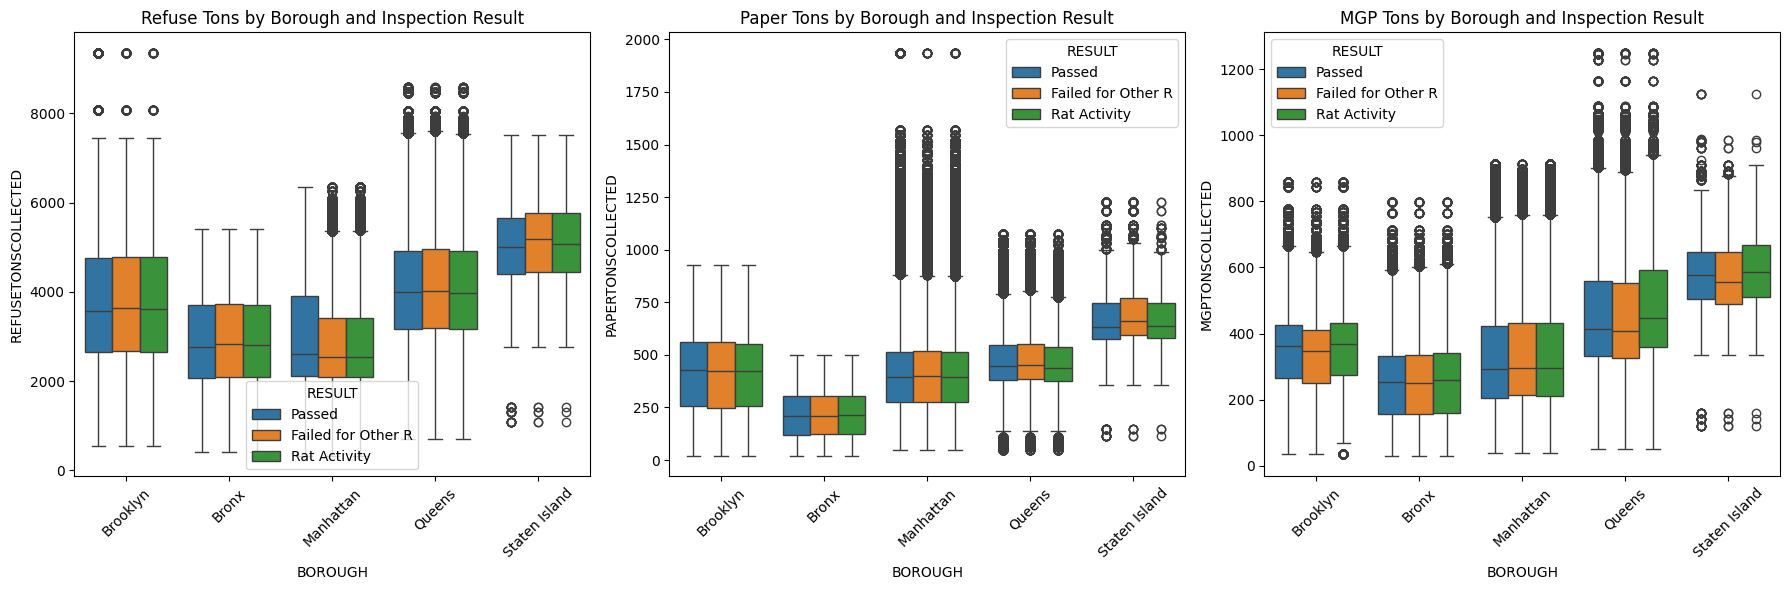

In [11]:
# Distribution of waste by borough and inspection result
plt.figure(figsize=(18, 6))

# Refuse waste by Borough
plt.subplot(131)
sns.boxplot(x='BOROUGH', y='REFUSETONSCOLLECTED', hue='RESULT', data=df)
plt.title('Refuse Tons by Borough and Inspection Result')
plt.xticks(rotation=45)

# Paper waste by Borough
plt.subplot(132)
sns.boxplot(x='BOROUGH', y='PAPERTONSCOLLECTED', hue='RESULT', data=df)
plt.title('Paper Tons by Borough and Inspection Result')
plt.xticks(rotation=45)

# MGP waste by Borough
plt.subplot(133)
sns.boxplot(x='BOROUGH', y='MGPTONSCOLLECTED', hue='RESULT', data=df)
plt.title('MGP Tons by Borough and Inspection Result')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


A simple way to see geographical distribution and overall borough coverage is to plot a scatter plot of all the inspections.

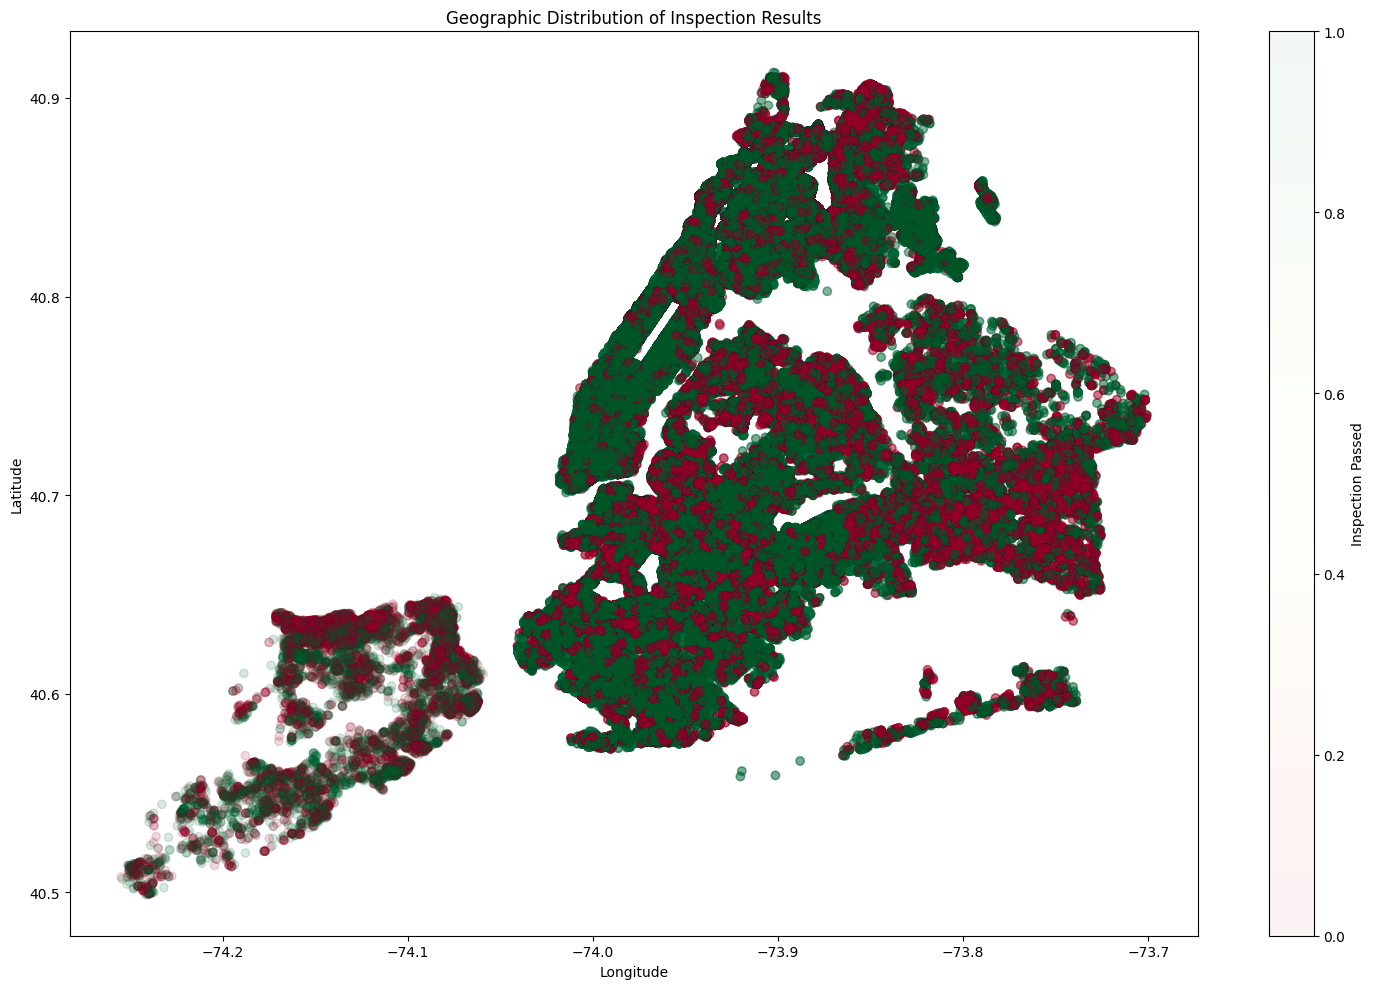

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(df['LONGITUDE'], df['LATITUDE'],
           c=df['RESULT'] == 'Passed',
           alpha=0.05,
           cmap='RdYlGn')
plt.title('Geographic Distribution of Inspection Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Inspection Passed')
plt.tight_layout()
plt.show()


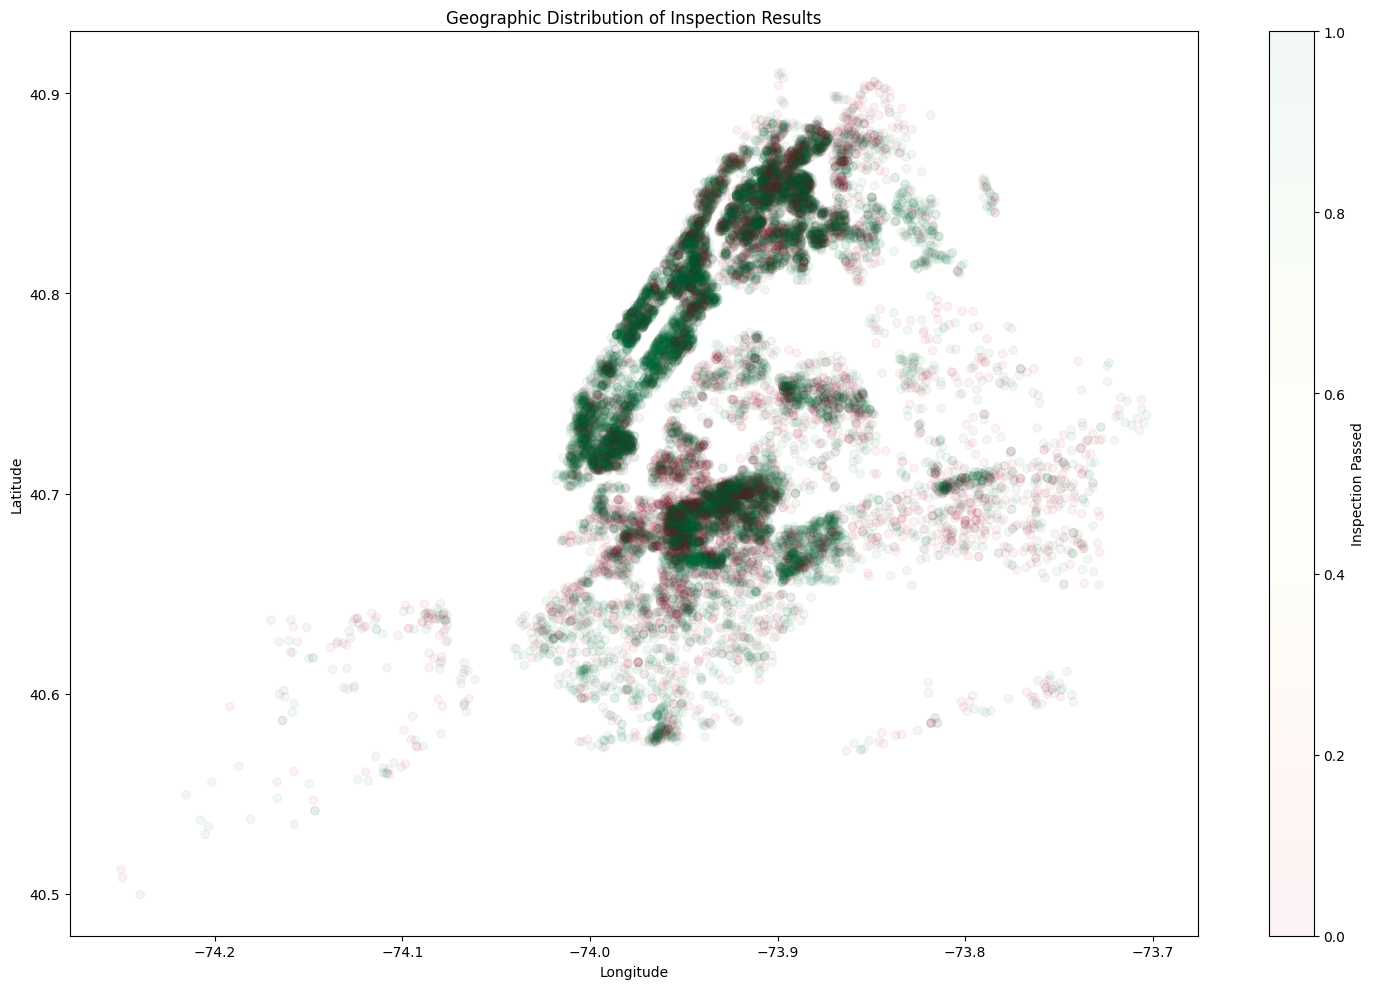

In [14]:
small_df = df.sample(frac=1, random_state=92).reset_index(drop=True)
n=25000
small_df = small_df[:n].dropna()

plt.figure(figsize=(15, 10))
plt.scatter(small_df['LONGITUDE'], small_df['LATITUDE'],
           c=small_df['RESULT'] == 'Passed',
           alpha=0.05,
           cmap='RdYlGn')
plt.title('Geographic Distribution of Inspection Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Inspection Passed')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


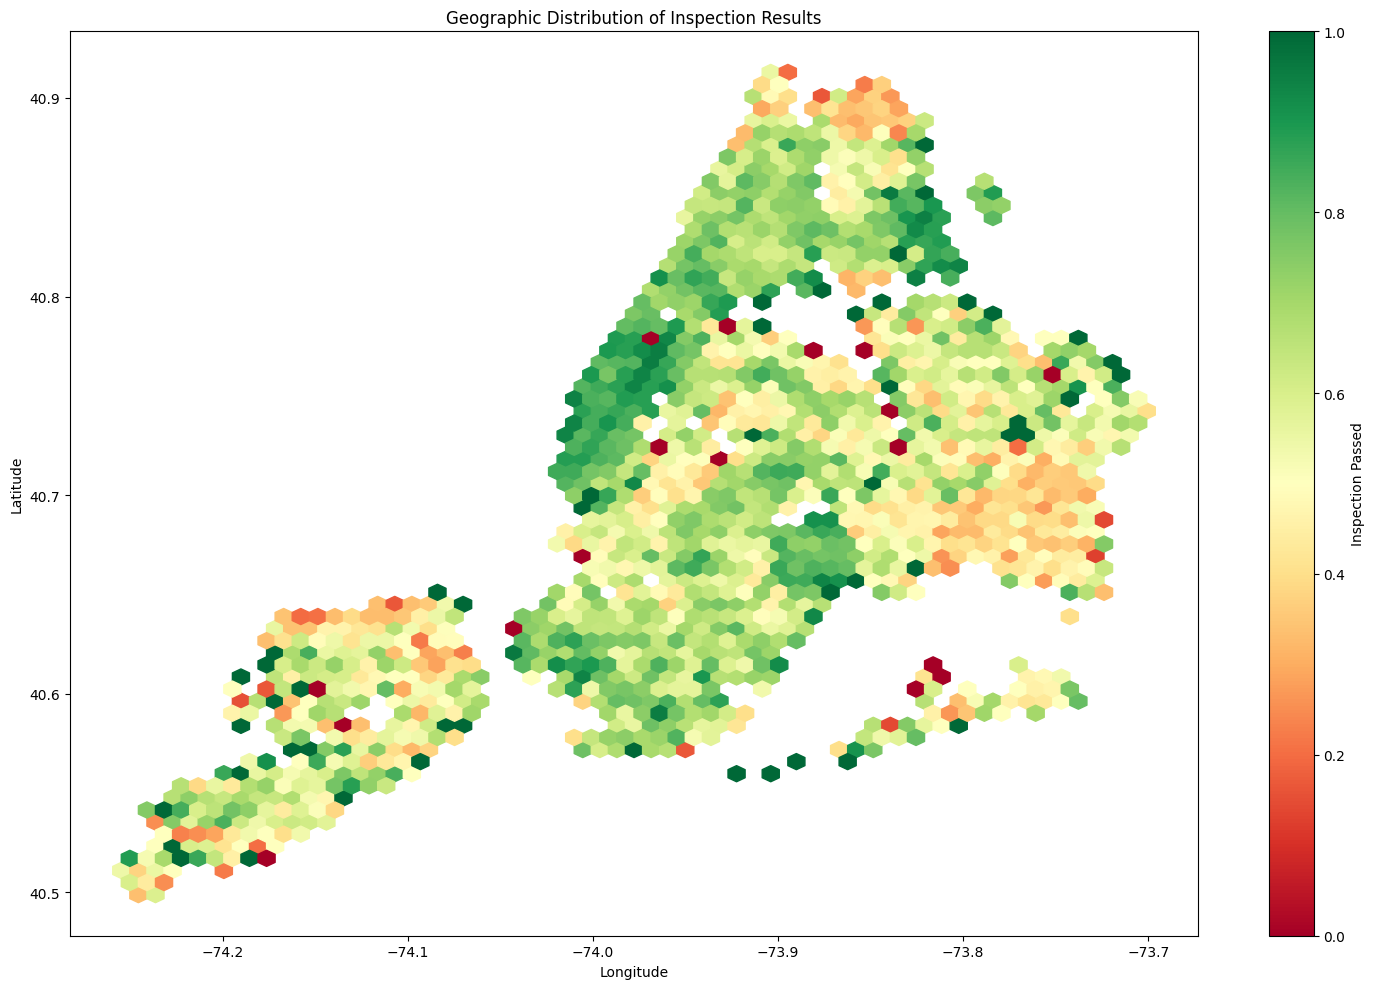

In [ ]:
# Create a hexbin plot
plt.figure(figsize=(15, 10))
plt.hexbin(df['LONGITUDE'], df['LATITUDE'],
           C=(df['RESULT'] == 'Passed'),
           cmap='RdYlGn', gridsize=60, reduce_C_function=np.mean)

# Add color bar
plt.colorbar(label='Inspection Passed')

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Inspection Results')

plt.tight_layout()
plt.show()


This map is particularly helpful in identifying problematic areas for rat sightings. Based on this, our high failure rate for staten island makes more sense. It also looks like southeast queens is bad, but is balanced out in the overall statistics by the northern half. Areas on the edges of the city and boroughs seem to have the most rats.

Overall, most of our data seems to be good, but it would be helpful to have some additional data such as population and temperature. We were able to find population data through Census ACS data, but have not yet found a suitable source for weather. While all of our data will not be covered by the population data, we can use the boro code to match up whatever we can.

Only about half of our data contains a match for population data. It might be more useful to match based on longitude and latitude but this is okay for some initial visualization.

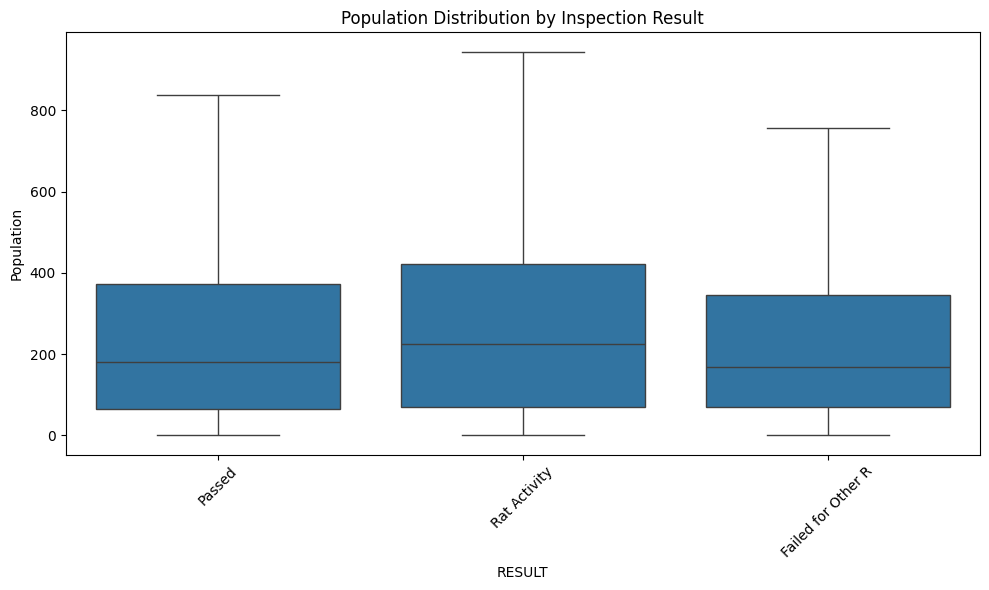

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.dropna(subset=['Pop1', 'RESULT']),
            x='RESULT',
            y='Pop1',showfliers=False)
plt.title('Population Distribution by Inspection Result')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Matching add population, area and population density data

In the cells below, we tried to use available census data to get an estimate for population at each inspection site. However, due to differences in how they store location, we were only able to get around 50% match for this data. This was very confined geographically compared to the initial data (large swathes of NYC were removed), so it did not make sense to make a model that would work for only small pockets of area with this added data. Thus, we have not used this for our model training.

In [ ]:

population_df['Pop1'] = population_df['Pop1'].replace(',', '', regex=True).astype(float)

# Reformat GeoID in inspection_df to match population_df
# Map BORO_CODE to FIPS_COUNTY
borough_to_fips = {1: '061', 2: '005', 3: '047', 4: '081', 5: '085'}
inspection_df['FIPS_COUNTY'] = inspection_df['BORO_CODE'].map(borough_to_fips)

# Construct GeoID in inspection_df
inspection_df['GeoID'] = (
    inspection_df['FIPS_COUNTY'].astype(str).str.zfill(3) +
    inspection_df['CENSUS TRACT'].astype(str).str.zfill(6).str.replace('.', '', regex=False) +  # Remove decimals
    inspection_df['BLOCK'].astype(str).str.zfill(4)
)

# Standardize GeoID in population_df
population_df['GeoID'] = population_df['GeoID'].astype(str)

# Deduplicate GeoID in inspection_df
inspection_df = inspection_df.drop_duplicates(subset=['GeoID'])

# Merge the datasets on GeoID
merged_df = pd.merge(
    inspection_df,
    population_df,
    on='GeoID',
    how='left'
)

# Add an indicator column to show matches
merged_df['Population_Match'] = merged_df['Pop1'].notna()

# Diagnose potential issues
# 1. Check for unmatched rows in the inspection data
unmatched_rows = merged_df[merged_df['Pop1'].isna()]
print(f"Number of unmatched rows: {len(unmatched_rows)}")

# 2. Inspect unmatched GeoIDs
unmatched_geoids = unmatched_rows['GeoID'].unique()
print("Sample of unmatched GeoIDs:", unmatched_geoids[:10])

# 3. Validate GeoID formatting consistency
print("Sample of inspection GeoIDs:", inspection_df['GeoID'].head())
print("Sample of population GeoIDs:", population_df['GeoID'].head())

# 4. Check for duplicates in population GeoID
duplicate_population_geoids = population_df[population_df.duplicated('GeoID', keep=False)]
if not duplicate_population_geoids.empty:
    print("Duplicate GeoIDs in population data:")
    print(duplicate_population_geoids)

# Output match statistics
total_rows = len(inspection_df)
matched_rows = len(merged_df[merged_df['Population_Match']])
print(f"Match rate: {matched_rows / total_rows * 100:.2f}%")


Number of unmatched rows: 21691
Sample of unmatched GeoIDs: ['047024501817' '005013205592' '047026901851' '005036702958'
 '061023402032' '0611600101504' '0812770101462' '047039703366'
 '047055102431' '061018801688']
Sample of inspection GeoIDs: 0     047024501817
18    005013205592
30    047026901851
48    005036702958
60    061023402032
Name: GeoID, dtype: object
Sample of population GeoIDs: 0    20001000001
1    20001000002
2    20001001000
3    20001001001
4    20001001002
Name: GeoID, dtype: object
Match rate: 0.00%


In [ ]:
# Define a mapping from Borough + Census to Population FIPS Prefix
borough_fips_mapping = {
    1: '36061',  # Manhattan
    2: '36005',  # Bronx
    3: '36047',  # Brooklyn
    4: '36081',  # Queens
    5: '36085'   # Staten Island
}

# Update inspection_df GeoID construction to use full FIPS
inspection_df['GeoID'] = (
    inspection_df['BORO_CODE'].map(borough_fips_mapping).astype(str) +
    inspection_df['CENSUS TRACT'].astype(str).str.zfill(6).str.replace('.', '', regex=False) +
    inspection_df['BLOCK'].astype(str).str.zfill(4)
)

# Ensure GeoID in population_df is properly formatted
population_df['GeoID'] = population_df['GeoID'].astype(str)

# Deduplicate GeoID in inspection_df
inspection_df = inspection_df.drop_duplicates(subset=['GeoID'])

# Merge the datasets on GeoID
merged_df = pd.merge(
    inspection_df,
    population_df,
    on='GeoID',
    how='left'
)

# Add an indicator column to show matches
merged_df['Population_Match'] = merged_df['Pop1'].notna()

# Diagnose potential issues
unmatched_rows = merged_df[merged_df['Pop1'].isna()]
print(f"Number of unmatched rows: {len(unmatched_rows)}")
print("Sample of unmatched GeoIDs:", unmatched_rows['GeoID'].unique()[:10])

# Validate the new GeoIDs
print("Sample of inspection GeoIDs:", inspection_df['GeoID'].head())
print("Sample of population GeoIDs:", population_df['GeoID'].head())

# Match rate
total_rows = len(inspection_df)
matched_rows = len(merged_df[merged_df['Population_Match']])
print(f"Match rate: {matched_rows / total_rows * 100:.2f}%")


Number of unmatched rows: 21691
Sample of unmatched GeoIDs: ['36047024501817' '36005013205592' '36047026901851' '36005036702958'
 '36061023402032' '360611600101504' '360812770101462' '36047039703366'
 '36047055102431' '36061018801688']
Sample of inspection GeoIDs: 0     36047024501817
18    36005013205592
30    36047026901851
48    36005036702958
60    36061023402032
Name: GeoID, dtype: object
Sample of population GeoIDs: 0    20001000001
1    20001000002
2    20001001000
3    20001001001
4    20001001002
Name: GeoID, dtype: object
Match rate: 0.00%


<ipython-input-5-5103c45824e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspection_df['GeoID'] = (


In [ ]:
# Filter the dataframe to keep rows where Population_Match is True
df = df[df['Population_Match']]
# Reset the index after filtering, if desired
df = df.reset_index(drop=True)

# Display the first few rows to verify the results
print(df.head())
print(df['Population_Match'].value_counts())


  INSPECTION_TYPE           BBL  BORO_CODE  BLOCK  LOT HOUSE_NUMBER  \
0      Compliance  3.010270e+09          3   1027   26          192   
1      Compliance  3.010270e+09          3   1027   26          192   
2      Compliance  3.010270e+09          3   1027   26          192   
3      Compliance  3.010270e+09          3   1027   26          192   
4      Compliance  3.010270e+09          3   1027   26          192   

  STREET_NAME  ZIP_CODE   X_COORD   Y_COORD  ...  month_12  FIPS_COUNTY  \
0   12 STREET   11215.0  986705.0  183005.0  ...     False           47   
1   12 STREET   11215.0  986705.0  183005.0  ...     False           47   
2   12 STREET   11215.0  986705.0  183005.0  ...     False           47   
3   12 STREET   11215.0  986705.0  183005.0  ...     False           47   
4   12 STREET   11215.0  986705.0  183005.0  ...     False           47   

  FIPSCode BoroCode  GeogName         GeoID   Pop1  LandAcres   Block  \
0     47.0      3.0  Brooklyn  3.016400e+10   61.

In [ ]:
# Ensure Pop1 and LandAcres columns are numeric
df['Pop1'] = pd.to_numeric(df['Pop1'], errors='coerce')  # Convert to float, set invalid parsing as NaN
df['LandAcres'] = pd.to_numeric(df['LandAcres'], errors='coerce')  # Convert to float, set invalid parsing as NaN

# Avoid divide by zero by replacing 0 or NaN in LandAcres with NaN in Population_Density
df['Population_Density'] = df['Pop1'] / df['LandAcres']
df['Population_Density'] = df['Population_Density'].replace([float('inf'), -float('inf')], float('nan'))

# Drop the Population_Match column
df = df.drop(columns=['Population_Match'])

# Display the first few rows to verify the results
print(df.head())


NameError: name 'pd' is not defined

In [ ]:
population_df = pd.read_csv('/content/drive/MyDrive/Deep Dive Team 20/Milestone2/popdata.csv')


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the inspection data
inspection_df['geometry'] = inspection_df.apply(
    lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1
)
inspection_gdf = gpd.GeoDataFrame(inspection_df, geometry='geometry', crs="EPSG:4326")

# Load the PLUTO dataset or similar, ensuring it has GeoID and tax lot geometries
pluto_gdf = gpd.read_file("/content/drive/MyDrive/Deep Dive Team 20/Milestone2/nycb2020_24d/nycb2020.shp")

# Ensure PLUTO is in the same coordinate reference system (CRS)
pluto_gdf = pluto_gdf.to_crs(inspection_gdf.crs)


In [ ]:
joined_gdf.head()

,INSPECTION_TYPE,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,...,geometry,index_right,CB2020,BoroCode,BoroName,CT2020,BCTCB2020,GEOID,Shape_Leng,Shape_Area
0,Initial,3.018170e+09,3,1817,57,213,MADISON STREET,11216.0,997925.0,188814.0,...,POINT (-73.951 40.68467),26582.0,1000,3,Brooklyn,024500,30245001000,360470245001000,2590.481664,276736.132061
1,Initial,3.018170e+09,3,1817,57,213,MADISON STREET,11216.0,997925.0,188814.0,...,POINT (-73.951 40.68467),26582.0,1000,3,Brooklyn,024500,30245001000,360470245001000,2590.481664,276736.132061
2,Initial,3.018170e+09,3,1817,57,213,MADISON STREET,11216.0,997925.0,188814.0,...,POINT (-73.951 40.68467),26582.0,1000,3,Brooklyn,024500,30245001000,360470245001000,2590.481664,276736.132061
3,Initial,3.018170e+09,3,1817,57,213,MADISON STREET,11216.0,997925.0,188814.0,...,POINT (-73.951 40.68467),26582.0,1000,3,Brooklyn,024500,30245001000,360470245001000,2590.481664,276736.132061
4,Initial,3.018170e+09,3,1817,57,213,MADISON STREET,11216.0,997925.0,188814.0,...,POINT (-73.951 40.68467),26582.0,1000,3,Brooklyn,024500,30245001000,360470245001000,2590.481664,276736.132061


In [ ]:
joined_gdf['GEOID'] = joined_gdf['GEOID'].astype(str).str[:-4]  # Removes last 4 digits


In [ ]:
joined_gdf.rename(columns={'GEOID': 'GeoID'}, inplace=True)


In [ ]:
joined_gdf.to_pickle('joined_gdf.pkl')

In [ ]:
with open('/content/drive/MyDrive/Deep Dive Team 20/Milestone2/joined_gdf.pkl', 'rb') as f:
  joined_gdf = pickle.load(f)
population_df = pd.read_csv('/content/drive/MyDrive/Deep Dive Team 20/Milestone2/popdata.csv')


In [ ]:
joined_gdf.head(10000)

,INSPECTION_TYPE,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,...,geometry,index_right,CB2020,BoroCode,BoroName,CT2020,BCTCB2020,GeoID,Shape_Leng,Shape_Area
0,Initial,3.018170e+09,3,1817,57,213,MADISON STREET,11216.0,997925.0,188814.0,...,POINT (-73.951 40.68467),26582.0,1000,3,Brooklyn,024500,30245001000,36047024500,2590.481664,276736.132061
1,Initial,3.018170e+09,3,1817,57,213,MADISON STREET,11216.0,997925.0,188814.0,...,POINT (-73.951 40.68467),26582.0,1000,3,Brooklyn,024500,30245001000,36047024500,2590.481664,276736.132061
2,Initial,3.018170e+09,3,1817,57,213,MADISON STREET,11216.0,997925.0,188814.0,...,POINT (-73.951 40.68467),26582.0,1000,3,Brooklyn,024500,30245001000,36047024500,2590.481664,276736.132061
3,Initial,3.018170e+09,3,1817,57,213,MADISON STREET,11216.0,997925.0,188814.0,...,POINT (-73.951 40.68467),26582.0,1000,3,Brooklyn,024500,30245001000,36047024500,2590.481664,276736.132061
4,Initial,3.018170e+09,3,1817,57,213,MADISON STREET,11216.0,997925.0,188814.0,...,POINT (-73.951 40.68467),26582.0,1000,3,Brooklyn,024500,30245001000,36047024500,2590.481664,276736.132061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Initial,1.008270e+09,1,827,16,35,WEST 25 STREET,10010.0,986866.0,210290.0,...,POINT (-73.99016 40.74346),874.0,2001,1,Manhattan,005800,10058002001,36061005800,2162.995480,211354.565499
9996,Initial,1.008270e+09,1,827,16,35,WEST 25 STREET,10010.0,986866.0,210290.0,...,POINT (-73.99016 40.74346),874.0,2001,1,Manhattan,005800,10058002001,36061005800,2162.995480,211354.565499
9997,Initial,1.008270e+09,1,827,16,35,WEST 25 STREET,10010.0,986866.0,210290.0,...,POINT (-73.99016 40.74346),874.0,2001,1,Manhattan,005800,10058002001,36061005800,2162.995480,211354.565499
9998,Initial,1.008270e+09,1,827,16,35,WEST 25 STREET,10010.0,986866.0,210290.0,...,POINT (-73.99016 40.74346),874.0,2001,1,Manhattan,005800,10058002001,36061005800,2162.995480,211354.565499


In [ ]:
joined_gdf['GeoID'] = joined_gdf['GeoID'].astype(str)
population_df['GeoID'] = population_df['GeoID'].astype(str)

# Merge the joined GeoID data with the population dataset
merged_df = pd.merge(
    joined_gdf, population_df, on="GeoID", how="left"
)

# Create an indicator column to check if a match was found
merged_df['Population_Match'] = merged_df['Pop1'].notna()

# Check match rate
total_rows = len(inspection_df)
matched_rows = merged_df['Population_Match'].sum()
print(f"Match rate: {matched_rows / total_rows * 100:.2f}%")


Match rate: 0.00%


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
# Load the PLUTO dataset or similar, ensuring it has GeoID and tax lot geometries
pluto_gdf = gpd.read_file("/content/drive/MyDrive/Deep Dive Team 20/Milestone2/nycb2020_24d/nycb2020.shp")

# Ensure PLUTO is in the same coordinate reference system (CRS)
pluto_gdf = pluto_gdf.to_crs(merged_df.crs)

# Load the shapefile for the PLUTO dataset or use census tract polygons (GeoID)
# If already done earlier, you should have 'pluto_gdf' and 'inspection_gdf'

# Plot the census tracts (GeoID) and inspection points
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the PLUTO data (census tracts or tax lot boundaries)
pluto_gdf.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5, label="Census Tracts")

# Plot the inspection points
merged_df.plot(ax=ax, color='red', markersize=5, alpha=0.6, label="Inspection Points")

# Add a legend
plt.legend()

# Title and labels
plt.title("Inspection Points and Census Tract Boundaries", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


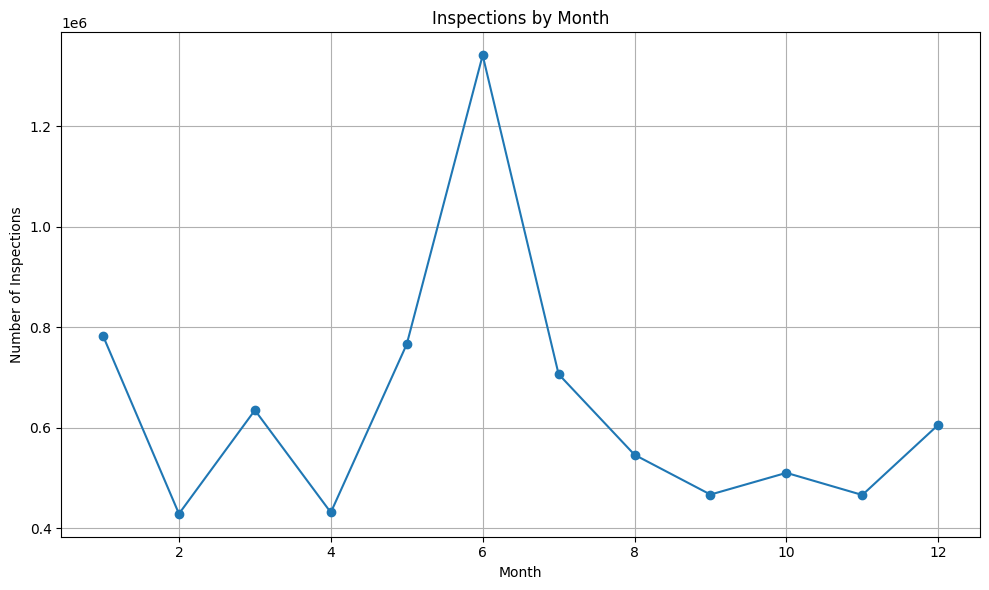

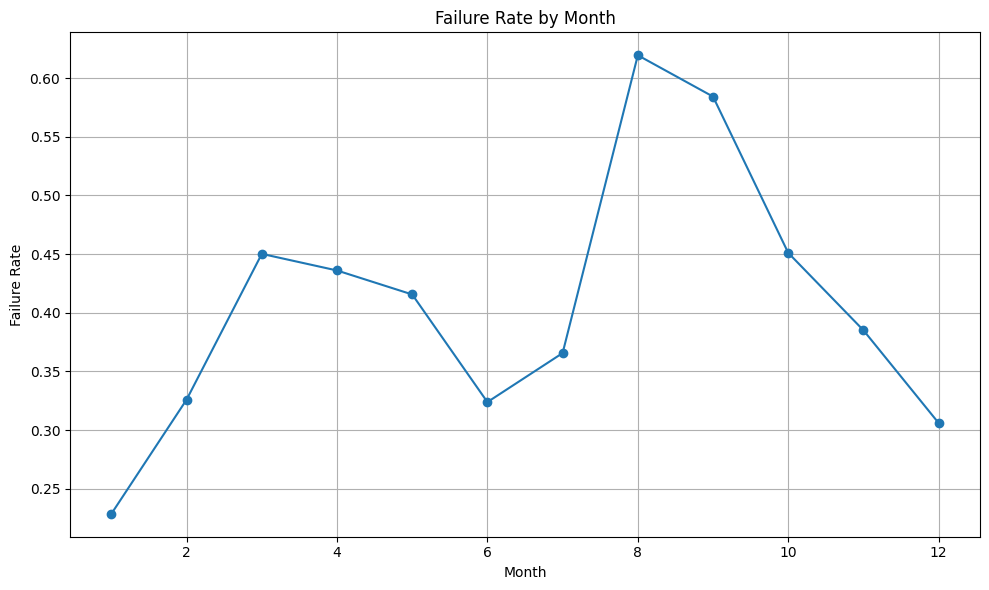

In [ ]:
plt.figure(figsize=(10, 6))
# Monthly inspection counts
monthly_counts = df.groupby('Month').size()
monthly_counts.plot(kind='line', marker='o')
plt.title('Inspections by Month')
plt.xlabel('Month')
plt.ylabel('Number of Inspections')
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly failure rates
plt.figure(figsize=(10, 6))
monthly_fails = df.groupby('Month')['RESULT'].apply(
    lambda x: (x != 'Passed').mean()
)
monthly_fails.plot(kind='line', marker='o')
plt.title('Failure Rate by Month')
plt.xlabel('Month')
plt.ylabel('Failure Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Spatial join to assign GeoIDs to tax lots in the inspection data
joined_gdf = gpd.sjoin(inspection_gdf, pluto_gdf, how="left", predicate="intersects")

# Verify results
print(joined_gdf.head())


  INSPECTION_TYPE           BBL  BORO_CODE  BLOCK  LOT HOUSE_NUMBER  \
0         Initial  3.018170e+09          3   1817   57          213   
1         Initial  3.018170e+09          3   1817   57          213   
2         Initial  3.018170e+09          3   1817   57          213   
3         Initial  3.018170e+09          3   1817   57          213   
4         Initial  3.018170e+09          3   1817   57          213   

      STREET_NAME  ZIP_CODE   X_COORD   Y_COORD  ...  \
0  MADISON STREET   11216.0  997925.0  188814.0  ...   
1  MADISON STREET   11216.0  997925.0  188814.0  ...   
2  MADISON STREET   11216.0  997925.0  188814.0  ...   
3  MADISON STREET   11216.0  997925.0  188814.0  ...   
4  MADISON STREET   11216.0  997925.0  188814.0  ...   

                   geometry  index_right CB2020 BoroCode  BoroName  CT2020  \
0  POINT (-73.951 40.68467)      26582.0   1000        3  Brooklyn  024500   
1  POINT (-73.951 40.68467)      26582.0   1000        3  Brooklyn  024500   
2 

In [ ]:
df.to_pickle('full_dataset_one_hot_encoded_with_popdens.pkl')